# Classification solution - Iris dataset


## Loading of Data

In [1]:
import pandas as pd

seeds = pd.read_csv('seeds_dataset.csv')

seeds.head()

,obs,area,perimeter,compactness,length,width,volume,location,asymmetry,grooveLength,variety
0,1,15.26,14.84,0.8710,5.763,3.312,.,NaN,2.221,5.220,1.0
1,2,14.88,14.57,0.8811,5.554,3.333,NaN,NaN,1.018,4.956,1.0
2,3,14.29,14.09,0.9050,5.291,3.337,NaN,NaN,2.699,4.825,1.0
3,4,13.84,13.94,0.8955,5.324,3.379,;,NaN,2.259,4.805,1.0
4,5,16.14,14.99,0.9034,5.658,3.562,NaN,NaN,1.355,5.175,1.0


In [2]:
seeds.describe()

,obs,area,perimeter,compactness,length,width,location,asymmetry,grooveLength,variety
count,211.00000,210.000000,210.000000,210.000000,210.000000,210.000000,0.0,210.000000,210.000000,210.000000
mean,106.00000,14.847524,14.559286,0.870999,5.628533,3.258605,NaN,3.700201,5.408071,2.000000
std,61.05462,2.909699,1.305959,0.023629,0.443063,0.377714,NaN,1.503557,0.491480,0.818448
min,1.00000,10.590000,12.410000,0.808100,4.899000,2.630000,NaN,0.765100,4.519000,1.000000
25%,53.50000,12.270000,13.450000,0.856900,5.262250,2.944000,NaN,2.561500,5.045000,1.000000
50%,106.00000,14.355000,14.320000,0.873450,5.523500,3.237000,NaN,3.599000,5.223000,2.000000
75%,158.50000,17.305000,15.715000,0.887775,5.979750,3.561750,NaN,4.768750,5.877000,3.000000
max,211.00000,21.180000,17.250000,0.918300,6.675000,4.033000,NaN,8.456000,6.550000,3.000000


In [3]:
len(seeds)

211

In [4]:
seeds.isnull().sum()

obs               0
area              1
perimeter         1
compactness       1
length            1
width             1
volume          205
location        211
asymmetry         1
grooveLength      1
variety           1
dtype: int64

From the above observations, the following is certain: 1 row contains null values, 'location' column is completely null (211/211), 'volume' column is predominantly null (205/211), 'obs' column is not a predictor variable and therefore redundant, 7 columns are predictor variables and 'variety' is the target variable with 3 classes, making it a multi-class classification.

## Data Cleaning

In [5]:
seeds.drop(['obs','volume', 'location'], axis=1, inplace=True)
seeds.dropna(inplace=True)
seeds.isnull().sum()

area            0
perimeter       0
compactness     0
length          0
width           0
asymmetry       0
grooveLength    0
variety         0
dtype: int64

Seperating the features $x$ from the labels $y$

In [6]:
features = seeds.columns[0:7]
label = seeds.columns[7]

X, y = seeds[features].values, seeds[label].values

## Plotting of Boxplots & Histograms for Data Visualisation & Exploration

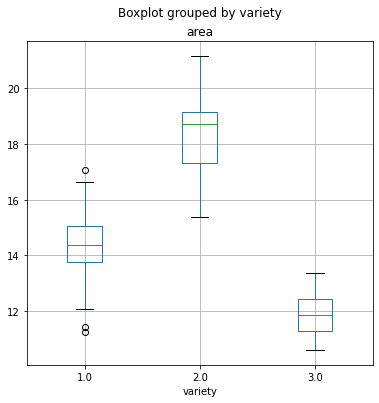

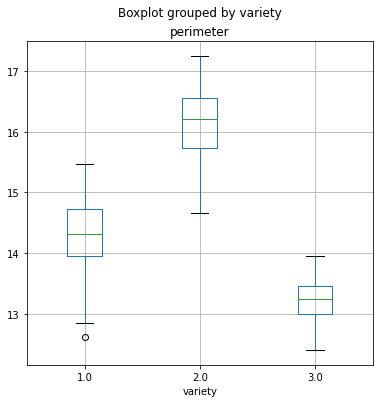

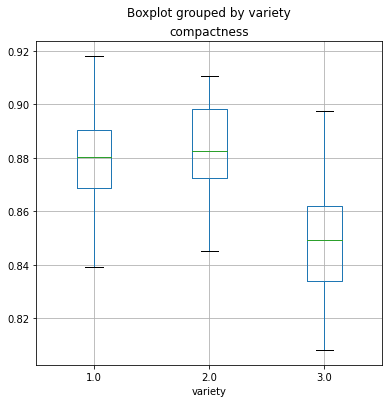

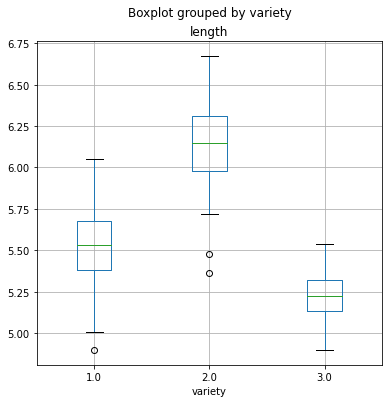

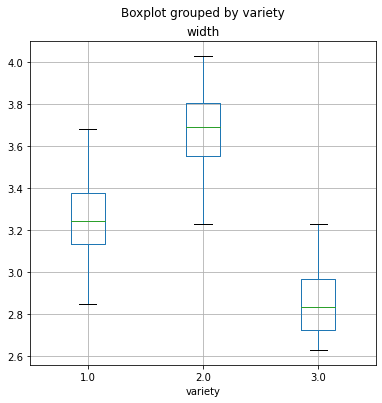

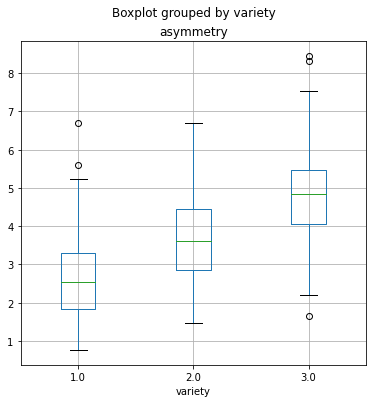

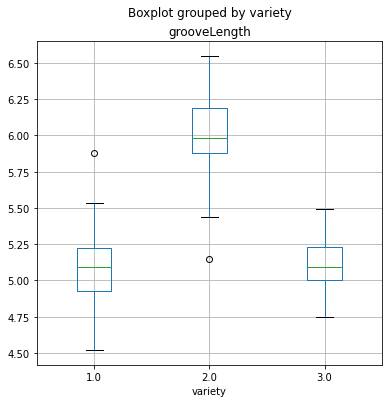

In [7]:
from matplotlib import pyplot as plt

for col in features:
    seeds.boxplot(column=col, by=label, figsize=(6,6))
    plt.title(col)
plt.show()

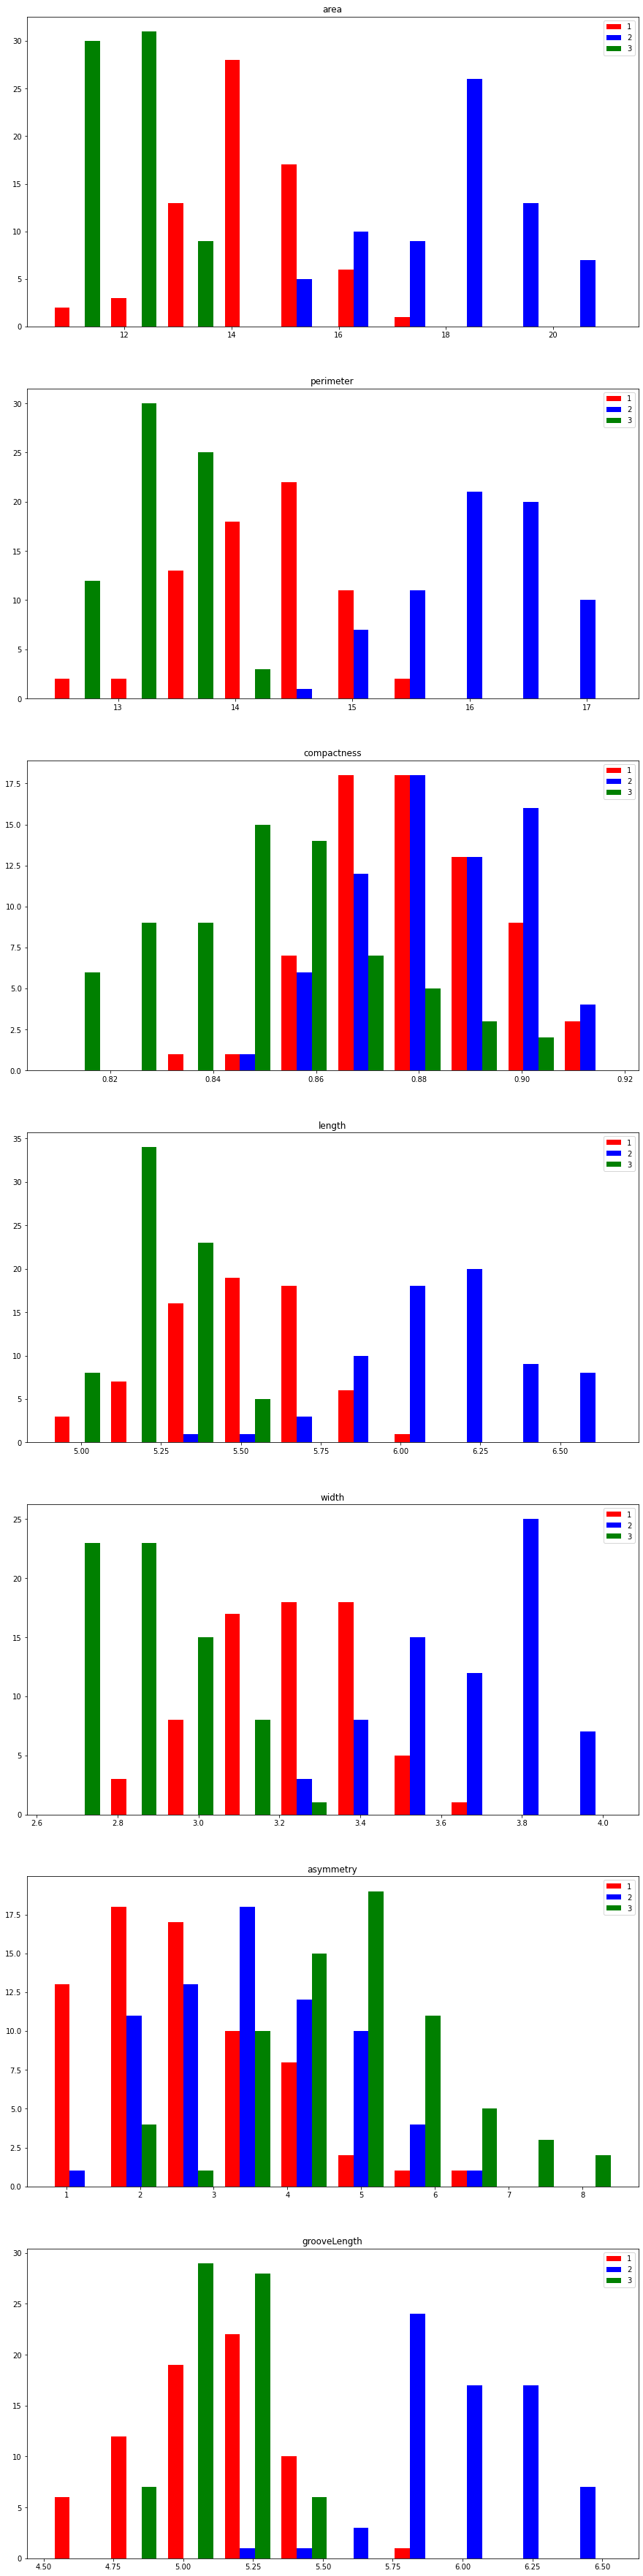

In [8]:
fig, ax = plt.subplots(7, 1, figsize=(15, 8*8 ))

i=0
for col in features:
    seeds_1 = seeds[seeds['variety']==1][col]
    seeds_2 =  seeds[seeds['variety']==2][col]
    seeds_3 =  seeds[seeds['variety']==3][col]
    ax[i].hist([seeds_1, seeds_2, seeds_3], color=['red','blue','green'], label=['1','2','3'])
    ax[i].legend(loc='best')
    ax[i].set_title(col)
    i += 1
plt.show()

From the Boxplots and Histograms it can be observed that the distribution of all 3 classes of the target variable overlap eachother practically in all predictor variables, more so in some such as 'asymmetry' than in others.

## PCA

Identifying the ideal number of PCs based on the following 3 techniques:

1. The Cattell-Scree test looks at the plotted eigenvalues.  This plot typically shows a sharp bend, or “elbow”.  PCs with eigenvalues above this sharp bend are kept.

2. Second technique is to take the PCs with a cumulative variance higher than 70%.

3. The Kaiser-Harris criterion recommends taking all PCs with an eigenvalue greater than 1.  PCs with an eigenvalue less than 1 explain less information than a single variable in the data.

In [9]:
from sklearn.preprocessing import StandardScaler

#Applying data standarization to get all features into the same scale
standard_scaler = StandardScaler()
#Computing mean & std dev to be used for scaling
standard_scaler.fit(X)
#Transforming the values
X_scaled = standard_scaler.transform(X)
X_scaled

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

[ 71.87  88.98  98.67  99.65  99.92 100.   100.01]


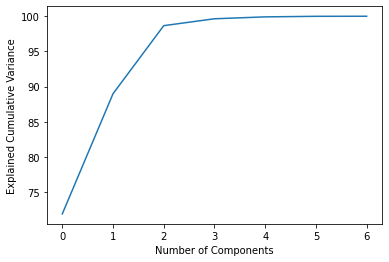

In [10]:
#1 Cattell-Scree Test

from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(X_scaled)

cumvar = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cumvar)
plt.xlabel('Number of Components')
plt.ylabel('Explained Cumulative Variance')
plt.plot(cumvar)

As indicated from the sharp bend from the Scree Plot, the first 3 PCs (which explain 98.67% of the data) are to be used.

Moreover, the first component alone explains 71.87% which satisfies the second technique whereby PCs with a cumulative variance greater than 70% are selected.

In [11]:
#3 Kaiser-Harris Citerion

print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Eigenvectors \n%s' %pca.components_)


Eigenvalues 
[5.05527392e+00 1.20330286e+00 6.81247474e-01 6.86915798e-02
 1.88031478e-02 5.35755786e-03 8.16283865e-04]
Eigenvectors 
[[ 0.44447352  0.44157147  0.27701737  0.42356333  0.43281866 -0.11869248
   0.38716084]
 [-0.02656355 -0.08400282  0.52915125 -0.20597518  0.11668963 -0.71688203
  -0.37719327]
 [ 0.02587094 -0.05983912  0.62969178 -0.21187966  0.21648338  0.67950584
  -0.2138972 ]
 [ 0.19363997  0.29545659 -0.3328164   0.26340659  0.19963039  0.09246481
  -0.80414995]
 [ 0.20441167  0.17427591 -0.33265481 -0.76609839  0.46536555 -0.03625822
   0.11134657]
 [-0.42643686 -0.47623853 -0.14162884  0.27357647  0.70301171 -0.01964186
   0.04282974]
 [ 0.73480569 -0.67075153 -0.0725527   0.04627605 -0.03928908 -0.00372346
  -0.0344981 ]]


Using the Kaiser-Harris Criterion, only the first 2 Eigenvalues are > 1 and therefore the only the first 2 PCs are considered as significant.

Test results of the 3 different techniques are as follow:
1. Cattell-Scree test = 3 PCs
2. Cumulitave Variance > 70% = 1 PC
3. Kaiser-Harris criterion = 2 PCs

Therefore with a mean result of 2, the dataset is to be tranformed into 2 PCs.

In [12]:
#Transforming dataset to 2 components
pca_2 = PCA(n_components=2)
pca_2.fit(X_scaled)

features_pca_2 = pca.fit_transform(X_scaled)

## Correlation Circle for the first 2 PCs

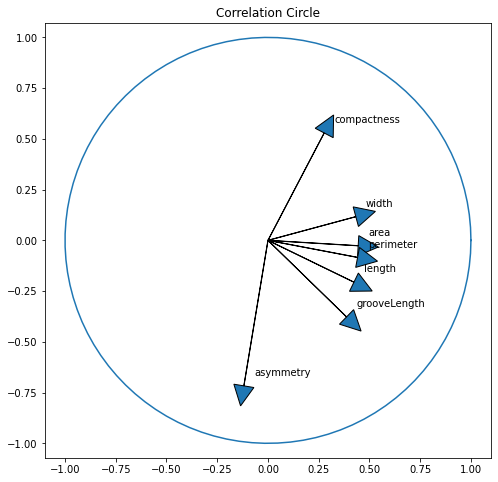

In [13]:
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca_2.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca_2.components_[0, i],  #0 for PC1
             pca_2.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca_2.components_[0, i] + 0.05,
             pca_2.components_[1, i] + 0.05,
             seeds.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Correlation Circle')
plt.show()

# Random Forest Section

## Data Splitting, Random Forest Training, Prediction, & Generation of Classification Report & Confusion Matrix

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

rf_data_x, rf_data_y = features_pca_2, y
df = pd.DataFrame()
r = 0.4
ratio = [0.4, 0.3, 0.2]
n = 100
trees = [100, 550, 1000]

for r in ratio:
    i=1
    iteration = [1, 2, 3, 4, 5]
    for i in iteration:
        rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(rf_data_x, rf_data_y, test_size=r, random_state=i, stratify=rf_data_y)
        random_forest = RandomForestClassifier(n_estimators=n, bootstrap=False).fit(rf_x_train,rf_y_train)
        rf_predictions = random_forest.predict(rf_x_test)
        
        print('Iteration number: ', i)
        print('Training Set %d\nTest Set %d\n'%(rf_x_train.shape[0], rf_x_test.shape[0]))
        print('Number of Trees: ', n)
        print('Predicted labels: ', rf_predictions[:20])
        print('Actual labels: ', rf_y_test[:20])        
        rf_classification = classification_report(rf_y_test, rf_predictions, output_dict=True)
        rf_cm = confusion_matrix(rf_y_test, rf_predictions)
        print(rf_classification)
        print(rf_cm)
        print()
        
        ##CLASSIFICATION REPORT EXPORT - UNCOMMENT TO EXPORT TO EXCEL FILES
        #report_df = pd.DataFrame(rf_classification).transpose()
        #df = df.append(report_df)
        #df.to_excel('seeds_results1.xlsx', sheet_name='RF_Raw')
        
        ##CONFUSION MATRIX EXPORT - UNCOMMENT TO EXPORT TO EXCEL FILES
        #report_df = pd.DataFrame(rf_cm).transpose()
        #df = df.append(report_df)
        #df.to_excel('seeds_results2.xlsx', sheet_name='RF_CM_Raw')
            
        i += 1
    r -= 0.1
    n += 450

Iteration number:  1
Training Set 126
Test Set 84

Number of Trees:  100
Predicted labels:  [3. 2. 1. 2. 2. 1. 1. 2. 3. 3. 2. 1. 1. 3. 1. 2. 1. 3. 2. 3.]
Actual labels:  [3. 2. 1. 2. 2. 1. 1. 2. 3. 3. 2. 1. 1. 3. 1. 2. 3. 3. 2. 3.]
Accuracy :  0.9523809523809523
{'1.0': {'precision': 0.9285714285714286, 'recall': 0.9285714285714286, 'f1-score': 0.9285714285714286, 'support': 28}, '2.0': {'precision': 0.9655172413793104, 'recall': 1.0, 'f1-score': 0.9824561403508771, 'support': 28}, '3.0': {'precision': 0.9629629629629629, 'recall': 0.9285714285714286, 'f1-score': 0.9454545454545454, 'support': 28}, 'accuracy': 0.9523809523809523, 'macro avg': {'precision': 0.9523505443045672, 'recall': 0.9523809523809524, 'f1-score': 0.9521607047922838, 'support': 84}, 'weighted avg': {'precision': 0.9523505443045673, 'recall': 0.9523809523809523, 'f1-score': 0.9521607047922837, 'support': 84}}
[[26  1  1]
 [ 0 28  0]
 [ 2  0 26]]

Iteration number:  2
Training Set 126
Test Set 84

Number of Trees:  10

# ANN Section

## Data Scaling

Convert all values to the same range from 0 to 1.

In [15]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaled = min_max_scaler.fit_transform(X_scaled)
print(scaled)

[[0.44098206 0.50206612 0.5707804  ... 0.48610121 0.18930164 0.34515017]
 [0.40509915 0.44628099 0.66243194 ... 0.50106914 0.03288302 0.21516494]
 [0.34938621 0.34710744 0.87931034 ... 0.50392017 0.25145302 0.1506647 ]
 ...
 [0.24645892 0.25826446 0.7277677  ... 0.42908054 0.98166664 0.26440177]
 [0.11803588 0.16528926 0.39927405 ... 0.14682823 0.36834441 0.25849335]
 [0.16147309 0.19214876 0.54718693 ... 0.24518888 0.63346292 0.26784835]]


## Data Splitting, Artificial Neural Networks Training, Prediction, & Generation of Classification Report & Confusion Matrix

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

ann_data_X, ann_data_y = scaled, y
df = pd.DataFrame()
r = 0.4
ratio = [0.4, 0.3, 0.2]
l = 100
layers = [100, 200, 300]

for r in ratio:
    i=1
    iteration = [1, 2, 3, 4, 5]
    for i in iteration:
        ann_x_train, ann_x_test, ann_y_train, ann_y_test = train_test_split(ann_data_X, ann_data_y, test_size=r, random_state=i, stratify=ann_data_y)
        mlp = MLPClassifier(hidden_layer_sizes=(l, l, l), solver='lbfgs', max_iter=500)
        mlp.fit(ann_x_train, ann_y_train)

        ann_predictions = mlp.predict(ann_x_test)
        
        print('Iteration number: ', i)
        print('Number of Neurons in the hidden layers: ', l)
        print('Training Set %d\nTest Set %d\n'%(ann_x_train.shape[0], ann_x_test.shape[0]))
        print('Predicted labels: ', ann_predictions[:20])
        print('Actual labels: ', ann_y_test[:20])        
        ann_classification = classification_report(ann_y_test, ann_predictions, output_dict=True)
        ann_cm = confusion_matrix(ann_y_test, ann_predictions)
        print(ann_classification)
        print(ann_cm)
        print()
        
        ##CLASSIFICATION REPORT EXPORT - UNCOMMENT TO EXPORT TO EXCEL FILES
        #report_df = pd.DataFrame(rf_classification).transpose()
        #df = df.append(report_df)
        #df.to_excel('seeds_results3.xlsx', sheet_name='ANN_Raw')
        
        ##CONFUSION MATRIX EXPORT - UNCOMMENT TO EXPORT TO EXCEL FILES
        #report_df = pd.DataFrame(ann_cm).transpose()
        #df = df.append(report_df)
        #df.to_excel('seeds_results4.xlsx', sheet_name='ANN_CM_Raw')
        
        i += 1
    r -= 0.1
    l += 100

Iteration number:  1
Number of Neurons in the hidden layers:  100
Training Set 126
Test Set 84

Predicted labels:  [3. 2. 1. 2. 2. 1. 1. 2. 3. 3. 2. 1. 1. 3. 1. 2. 3. 1. 2. 3.]
Actual labels:  [3. 2. 1. 2. 2. 1. 1. 2. 3. 3. 2. 1. 1. 3. 1. 2. 3. 3. 2. 3.]
Accuracy :  0.9285714285714286
{'1.0': {'precision': 0.8235294117647058, 'recall': 1.0, 'f1-score': 0.9032258064516129, 'support': 28}, '2.0': {'precision': 1.0, 'recall': 0.8571428571428571, 'f1-score': 0.923076923076923, 'support': 28}, '3.0': {'precision': 1.0, 'recall': 0.9285714285714286, 'f1-score': 0.962962962962963, 'support': 28}, 'accuracy': 0.9285714285714286, 'macro avg': {'precision': 0.9411764705882352, 'recall': 0.9285714285714285, 'f1-score': 0.9297552308304997, 'support': 84}, 'weighted avg': {'precision': 0.9411764705882353, 'recall': 0.9285714285714286, 'f1-score': 0.9297552308304996, 'support': 84}}
[[28  0  0]
 [ 4 24  0]
 [ 2  0 26]]

Iteration number:  2
Number of Neurons in the hidden layers:  100
Training Set 1